In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("city_day.csv")
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11688,Delhi,2018-12-30,336.42,503.99,127.84,76.89,157.78,57.55,2.94,19.91,42.87,9.87,65.05,2.31,484.0,Severe
11689,Delhi,2018-12-31,319.69,494.51,105.28,70.54,133.87,56.00,2.70,17.38,41.44,9.10,59.74,2.53,509.0,Severe
11690,Delhi,2019-01-01,287.34,461.02,92.04,69.46,121.07,56.66,2.54,17.77,39.58,8.09,48.84,2.21,475.0,Severe
11691,Delhi,2019-01-02,331.20,515.72,101.08,75.06,133.85,63.63,2.78,18.27,43.30,10.04,58.70,2.42,501.0,Severe


In [6]:
import os
import pandas as pd

# Read the original CSV file
original_data = pd.read_csv('city_day.csv')

# Get unique cities from the 'City' column
unique_cities = original_data['City'].unique()

# Create a folder to store the city-specific CSV files
output_folder = '/content/drive/MyDrive/Colab Notebooks/city_data_files'
os.makedirs(output_folder, exist_ok=True)

# Loop through each city and save its data to a separate CSV file
for city in unique_cities:
    city_data = original_data[original_data['City'] == city]

    # Create a folder with the same name as the main file (city_day.csv)
    city_folder = os.path.join(output_folder, 'city_day')
    os.makedirs(city_folder, exist_ok=True)

    # Save the city-specific data to a CSV file within the city folder
    city_data.to_csv(os.path.join(city_folder, f'{city}_data.csv'), index=False)

print("CSV files created for each city in the 'main_file' folder.")


CSV files created for each city in the 'main_file' folder.


In [5]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/city_data_files/city_day/Delhi_data.csv")

nan_counts = df.isna().sum()

# Display the result
print("Total NaN values in each column:")
print(nan_counts)
df["AQI"]

Total NaN values in each column:
City            0
Date            0
PM2.5           2
PM10           77
NO              2
NO2             2
NOx             0
NH3             9
CO              0
SO2           110
O3             84
Benzene         0
Toluene         0
Xylene        781
AQI            10
AQI_Bucket     10
dtype: int64


0       472.0
1       454.0
2       143.0
3       319.0
4       325.0
        ...  
2004    112.0
2005    196.0
2006    233.0
2007    114.0
2008    101.0
Name: AQI, Length: 2009, dtype: float64

In [6]:
from datetime import datetime, timedelta

# Generate sample data for demonstration
date_range = pd.date_range(start='2015-01-01', end='2020-07-01', freq='D')
aqi_values = df["AQI"]

# Create a DataFrame with 'Date' and 'AQI' columns
df = pd.DataFrame({'Date': date_range, 'AQI': aqi_values})
df.set_index('Date', inplace=True)

# Display the DataFrame
print(df)

              AQI
Date             
2015-01-01  472.0
2015-01-02  454.0
2015-01-03  143.0
2015-01-04  319.0
2015-01-05  325.0
...           ...
2020-06-27  112.0
2020-06-28  196.0
2020-06-29  233.0
2020-06-30  114.0
2020-07-01  101.0

[2009 rows x 1 columns]


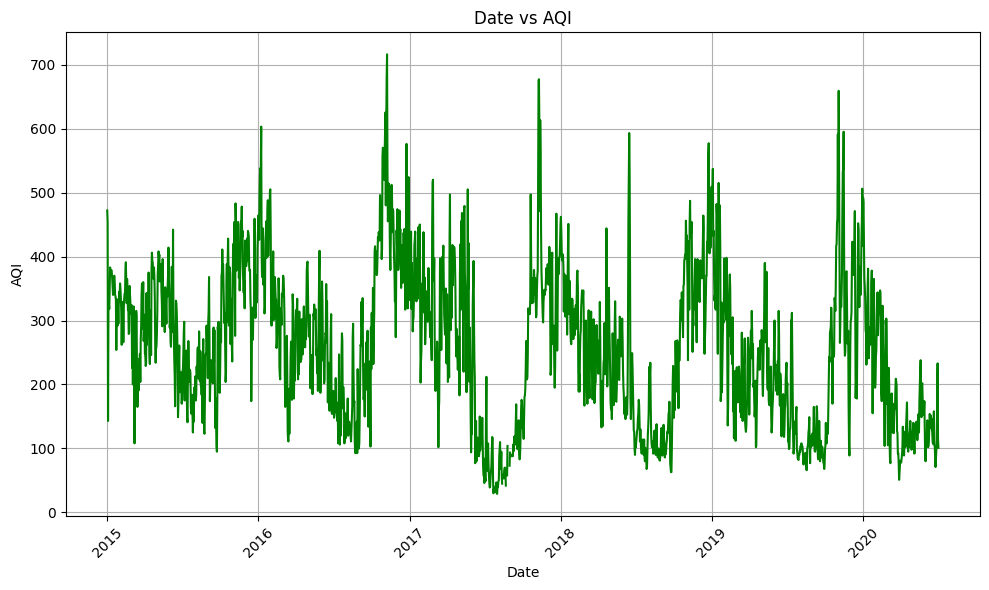

In [7]:
import matplotlib.pyplot as plt

# Plot Date vs AQI
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['AQI'], linestyle='-', color='g')
plt.title('Date vs AQI')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

# time series imputation


In [8]:
# Check for duplicate dates
duplicate_dates = df[df.index.duplicated(keep=False)]
print(duplicate_dates)
# Identify rows with NaN values
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows)

Empty DataFrame
Columns: [AQI]
Index: []
            AQI
Date           
2016-07-24  NaN
2017-06-23  NaN
2017-08-13  NaN
2017-08-14  NaN
2017-08-22  NaN
2017-08-23  NaN
2017-08-26  NaN
2017-08-27  NaN
2017-08-28  NaN
2017-08-29  NaN


In [12]:
# considering all the data for the time being, will remove the lockdown data if any discrepancy arises

df_t = df.interpolate(method='time')

df_l = df.interpolate(method='linear')

df_c = df.interpolate(method='spline', order = 3)
print("interpolation using time method:")
print(df_t['2017-08-13':'2017-08-29'])
print("interpolation using linear method:")
print(df_l['2017-08-13':'2017-08-29'])
print("interpolation using cubic spline method:")
print(df_c['2017-08-13':'2017-08-29'])

interpolation using time method:
                   AQI
Date                  
2017-08-13   49.666667
2017-08-14   54.333333
2017-08-15   59.000000
2017-08-16   53.000000
2017-08-17   66.000000
2017-08-18   70.000000
2017-08-19   70.000000
2017-08-20   63.000000
2017-08-21   42.000000
2017-08-22   47.333333
2017-08-23   52.666667
2017-08-24   58.000000
2017-08-25  104.000000
2017-08-26   97.800000
2017-08-27   91.600000
2017-08-28   85.400000
2017-08-29   79.200000
interpolation using linear method:
                   AQI
Date                  
2017-08-13   49.666667
2017-08-14   54.333333
2017-08-15   59.000000
2017-08-16   53.000000
2017-08-17   66.000000
2017-08-18   70.000000
2017-08-19   70.000000
2017-08-20   63.000000
2017-08-21   42.000000
2017-08-22   47.333333
2017-08-23   52.666667
2017-08-24   58.000000
2017-08-25  104.000000
2017-08-26   97.800000
2017-08-27   91.600000
2017-08-28   85.400000
2017-08-29   79.200000
interpolation using cubic spline method:
                 

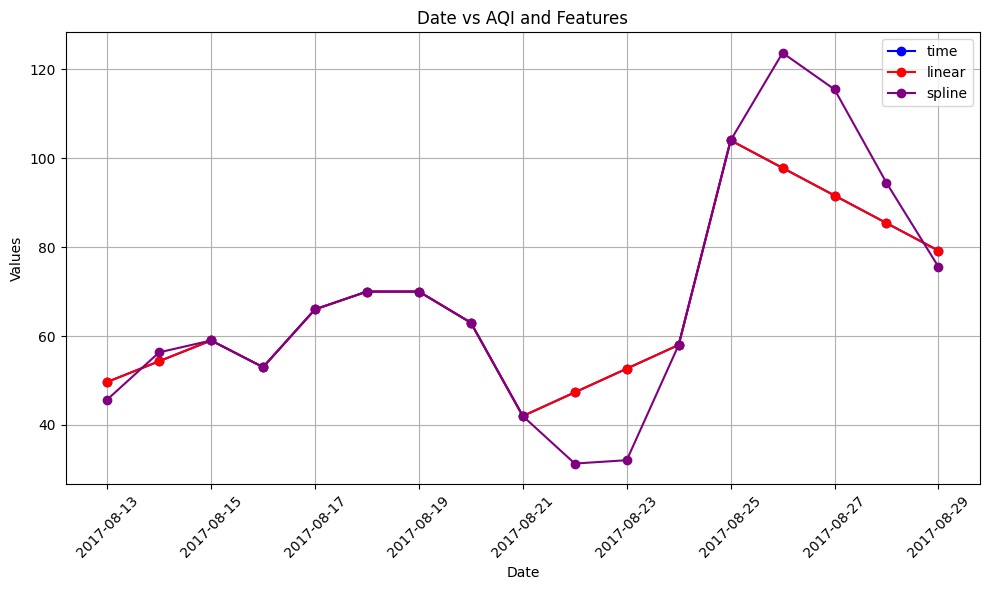

In [19]:
import matplotlib.pyplot as plt

dfs1 = df_t['2017-08-13':'2017-08-29']
dfs2 = df_l['2017-08-13':'2017-08-29']
dfs3 = df_c['2017-08-13':'2017-08-29']

# Plot Date vs AQI
plt.figure(figsize=(10, 6))
# Plot Feature1
plt.plot(dfs1.index, dfs1['AQI'], linestyle='-', color='b', marker='o', label='time')

# Plot Feature2
plt.plot(dfs2.index, dfs2['AQI'], linestyle='-', color='r', marker='o', label='linear')

# Plot Feature3
plt.plot(dfs3.index, dfs3['AQI'], linestyle='-', color='purple', marker='o', label='spline')

plt.title('Date vs AQI and Features')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()
# time and linear are giving the similar answer
df = dfs1

# train val test split


In [20]:
# 80% train 10% test 10% validation
from sklearn.model_selection import TimeSeriesSplit

# Define the size of the validation set and test set
validation_size = int(len(df) * 0.1)  # 20% of the data for validation
test_size = int(len(df) * 0.1)  # 20% of the data for testing

# Calculate the sizes of the training set
train_size = len(df) - validation_size - test_size

# Perform the train-test-validation split
train_data = df.iloc[:train_size]
validation_data = df.iloc[train_size:train_size + validation_size]
test_data = df.iloc[train_size + validation_size:]

# Display the sizes of the sets
print(f"Training set size: {len(train_data)}")
print(f"Validation set size: {len(validation_data)}")
print(f"Test set size: {len(test_data)}")

# Optionally, you can use TimeSeriesSplit for more advanced time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

for train_index, test_index in tscv.split(df):
    train_data_cv, test_data_cv = df.iloc[train_index], df.iloc[test_index]
    print(f"Cross-validation - Training set size: {len(train_data_cv)}, Test set size: {len(test_data_cv)}")


Training set size: 15
Validation set size: 1
Test set size: 1
Cross-validation - Training set size: 7, Test set size: 2
Cross-validation - Training set size: 9, Test set size: 2
Cross-validation - Training set size: 11, Test set size: 2
Cross-validation - Training set size: 13, Test set size: 2
Cross-validation - Training set size: 15, Test set size: 2


In [21]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

# Function to create sequences for time series forecasting
def create_sequences(data, target_column, sequence_length=3):
    sequences, targets = [], []

    for i in range(len(data) - sequence_length):
        seq = data.iloc[i:i + sequence_length].values
        target = data.iloc[i + sequence_length][target_column]
        sequences.append(seq)
        targets.append(target)

    return np.array(sequences), np.array(targets)

# Normalize the data
scaler = MinMaxScaler()
df['AQI_scaled'] = scaler.fit_transform(df[['AQI']])

# Create sequences and targets
sequence_length = 3
x_data, y_data = create_sequences(df['AQI_scaled'], target_column='AQI_scaled', sequence_length=sequence_length)

# Split the data using TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits as needed

for train_index, val_index in tscv.split(x_data):
    x_train, x_val = x_data[train_index], x_data[val_index]
    y_train, y_val = y_data[train_index], y_data[val_index]

    # Build and compile the model
    model = Sequential([
        layers.Input(shape=(sequence_length, 1)),
        layers.LSTM(64, activation='relu', return_sequences=True),
        layers.LSTM(32, activation='relu'),
        layers.Dense(32, activation="relu"),
        layers.Dense(1)
    ])

    model.compile(loss="mse", optimizer=Adam(learning_rate=0.001), metrics=["mean_absolute_error"])

    model.summary()

    # Train the model
    model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100)


<ipython-input-21-4a02a14bb23e>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AQI_scaled'] = scaler.fit_transform(df[['AQI']])


IndexError: invalid index to scalar variable.